# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [265]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [266]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.740000e+12,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2.340000e+12,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2.010000e+12,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5.150000e+12,34,Urban
4,South Jack,3/6/19 4:28,34.58,3.910000e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [267]:
#  1. Get the total rides for each city type

total_rides_per_city_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides_per_city_type.head()


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [268]:
# 2. Get the total drivers for each city type

# Get the total number of drivers for each city type
total_drivers_per_city_type = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_per_city_type.head()


type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [269]:
#  3. Get the total amount of fares for each city type 
total_fare_per_city_type = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fare_per_city_type.head()


type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [270]:
#  4. Get the average fare per ride for each city type. 

average_fare_per_city_type = pyber_data_df.groupby(["type"]).mean()["fare"]
average_fare_per_city_type.head()

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [271]:
# 5. Get the average fare per driver for each city type. 

average_fare_per_driver = total_fare_per_city_type / total_drivers_per_city_type
average_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [272]:
#  6. Create a PyBer summary DataFrame. 

PyBer_summary_df = PyBer_summary_df.groupby(pyber_data_df["type"])

PyBer_summary_df = pd.DataFrame(
  {"Total Rides": total_rides_per_city_type,
          "Total Drivers": total_drivers_per_city_type,
          "Total Fares": total_fare_per_city_type,
          "Average Fares per Ride": average_fare_per_city_type,
          "Average Fare per Driver": average_fare_per_driver})

PyBer_summary_df
         

,Total Rides,Total Drivers,Total Fares,Average Fares per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [273]:
#  7. Cleaning up the DataFrame. Delete the index name
PyBer_summary_df.index.name = None

PyBer_summary_df
         

,Total Rides,Total Drivers,Total Fares,Average Fares per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [274]:
#  8. Format the columns.

PyBer_summary_df["Total Rides"] = PyBer_summary_df["Total Rides"].map("{:,.0f}".format)

PyBer_summary_df["Total Drivers"] = PyBer_summary_df["Total Drivers"].map("{:,.0f}".format)

PyBer_summary_df["Total Fares"] = PyBer_summary_df["Total Fares"].map("${:,.2f}".format)

PyBer_summary_df["Average Fares per Ride"] = PyBer_summary_df["Average Fares per Ride"].map("${:,.2f}".format)

PyBer_summary_df["Average Fare per Driver"] = PyBer_summary_df["Average Fare per Driver"].map("${:,.2f}".format)


PyBer_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fares per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [284]:
# 1. Read the merged DataFrame

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.740000e+12,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2.340000e+12,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2.010000e+12,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5.150000e+12,34,Urban
4,South Jack,3/6/19 4:28,34.58,3.910000e+12,46,Urban


In [276]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

type_sum_fare_pyber_df = pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]


type_sum_fare_pyber_df.tail(10)

fare
type  date               
Urban 5/7/19 2:52   36.51
      5/7/19 5:55    6.89
      5/7/19 8:47   25.83
      5/8/19 11:38  19.77
      5/8/19 13:10  18.04
      5/8/19 1:54   32.69
      5/8/19 2:31   41.33
      5/8/19 4:20   21.99
      5/8/19 4:39   18.45
      5/8/19 7:29   18.55

In [277]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()

type_sum_fare_pyber_df = total_fare_pyber_df.reset_index()


type_sum_fare_pyber_df.tail(10)

,index,type,date,fare
2354,2354,Urban,5/7/19 2:52,36.51
2355,2355,Urban,5/7/19 5:55,6.89
2356,2356,Urban,5/7/19 8:47,25.83
2357,2357,Urban,5/8/19 11:38,19.77
2358,2358,Urban,5/8/19 13:10,18.04
2359,2359,Urban,5/8/19 1:54,32.69
2360,2360,Urban,5/8/19 2:31,41.33
2361,2361,Urban,5/8/19 4:20,21.99
2362,2362,Urban,5/8/19 4:39,18.45
2363,2363,Urban,5/8/19 7:29,18.55


In [285]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

type_sum_fare_pyber_pivot = type_sum_fare_pyber_df.pivot(index="date", columns="type", values="fare")
type_sum_fare_pyber_pivot.tail(10)

type,Rural,Suburban,Urban
date,,,
1/1/19 0:08,NaN,NaN,37.91
1/1/19 0:46,NaN,47.74,NaN
1/1/19 12:32,NaN,25.56,NaN
1/1/19 14:40,NaN,NaN,5.42
1/1/19 14:42,NaN,NaN,12.31
1/1/19 14:52,NaN,31.15,NaN
1/1/19 17:22,NaN,NaN,42.11
1/1/19 21:04,NaN,NaN,11.71
1/1/19 2:07,NaN,24.07,NaN


In [309]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

type_sum_fare_pyber_date = type_sum_fare_pyber_pivot.loc["2019-01-01":"2019-04-27"]


In [310]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

type_sum_fare_pyber_date.index = pd.to_datetime(type_sum_fare_pyber_date.index)
type_sum_fare_pyber_date


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 12:32:00,NaN,25.56,NaN
2019-01-01 14:40:00,NaN,NaN,5.42
2019-01-01 14:42:00,NaN,NaN,12.31
...,...,...,...
2019-04-09 20:55:00,NaN,NaN,24.99
2019-04-09 21:41:00,NaN,NaN,15.96
2019-04-09 08:10:00,NaN,NaN,39.36


In [311]:
# 7. Check that the datatype for the index is datetime using df.info()

type_sum_fare_pyber_date.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2163 entries, 2019-01-01 00:08:00 to 2019-04-09 09:17:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  564 non-null    float64
 2   Urban     1488 non-null   float64
dtypes: float64(3)
memory usage: 67.6 KB


In [312]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.


type_sum_fare_pyber_date_week = type_sum_fare_pyber_date.resample("W").sum()
type_sum_fare_pyber_date_week.head(10)


type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


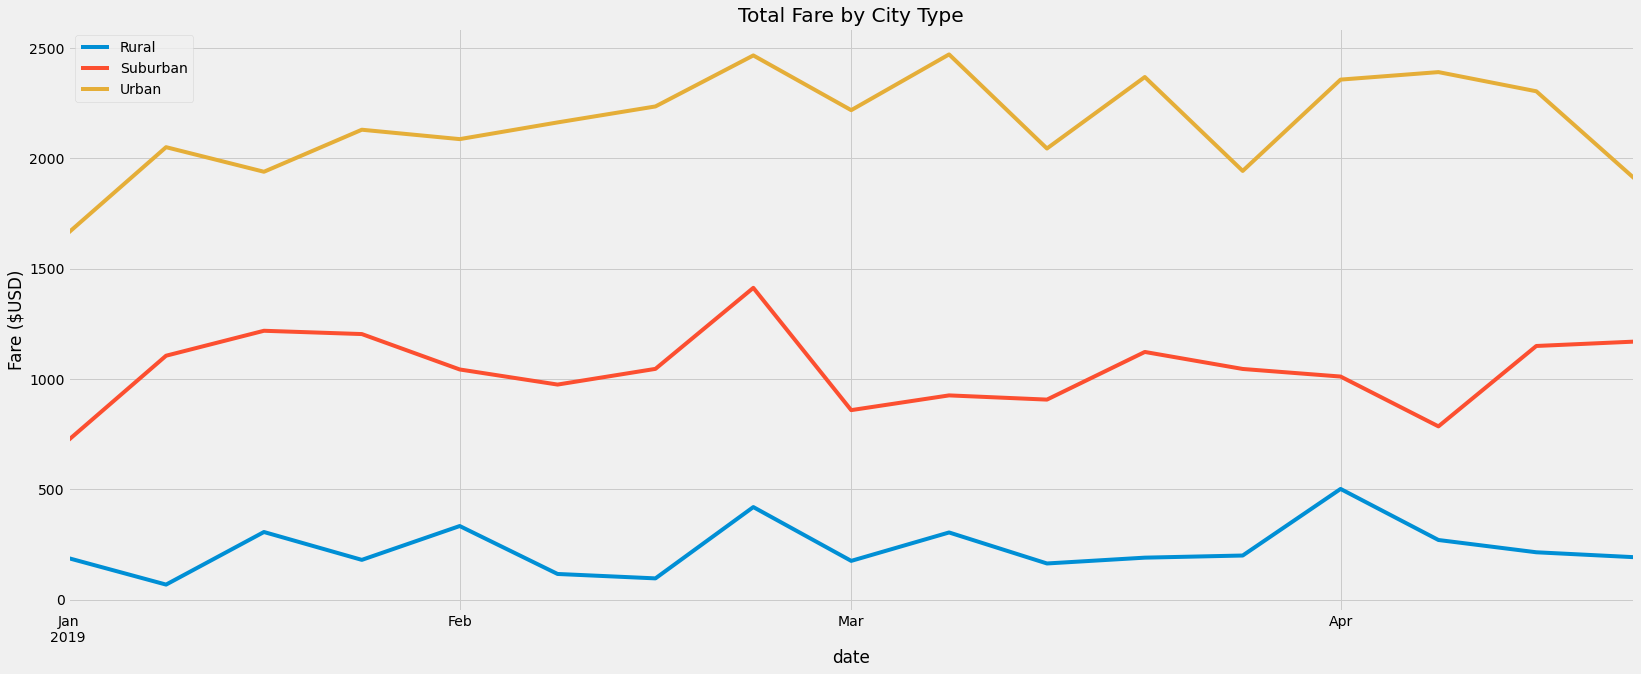

<Figure size 432x288 with 0 Axes>

In [317]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

ax = type_sum_fare_pyber_date_week.plot(figsize = (25,10))

#Add the title, y-axis, label and grid 
ax.set_title("Total Fare by City Type")
ax.set_ylabel("Fare ($USD)")

# Add the legend.
ax.legend()

# Show the plot
plt.show()

# Save the figure.
plt.savefig("analysis/PyBer_fare_summary.png")
